# **QSAR Model Building of Aromatase Inhibitors**

Vaibhav Ramakrishnan 

# Read in data

In [1]:
import pandas as pd

In [3]:
dataset = pd.read_csv('aromatase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.148742
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.623423
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.244125
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.267606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,10.045757
2112,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.142668
2113,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
2114,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.508638


In [4]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2112,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2113,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2114,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
Y = dataset.iloc[:,-1]
Y

0        5.148742
1        4.301030
2        6.623423
3        7.244125
4        7.267606
          ...    
2111    10.045757
2112     9.142668
2113     5.000000
2114     7.508638
2115     7.376751
Name: pIC50, Length: 2116, dtype: float64

# Remove low variance features

In [6]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP12,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP33,PubchemFP143,...,PubchemFP776,PubchemFP777,PubchemFP779,PubchemFP797,PubchemFP798,PubchemFP803,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP860
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,1,0
3,1,1,1,0,0,1,0,0,0,1,...,1,1,0,1,0,0,1,0,0,1
4,1,1,1,0,0,1,0,0,0,1,...,1,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111,1,1,1,1,1,1,1,0,0,1,...,1,1,0,0,0,1,0,1,0,0
2112,1,1,1,1,0,1,1,0,1,1,...,1,1,0,1,1,0,1,0,0,0
2113,0,0,1,1,0,1,1,0,1,1,...,1,1,0,1,1,0,1,0,0,0
2114,1,1,1,1,1,1,1,0,0,1,...,1,1,0,0,0,1,0,1,0,0


In [7]:
X.to_csv('descriptor_list.csv', index = False)

In [8]:
# In the app, use the following to get this same descriptor list
# of 248 variables from the initial set of 881 variables
# Xlist = list(pd.read_csv('descriptor_list.csv').columns)
# X[Xlist]

# Random Forest Regression Model

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.765210846171833

## Model Prediction

In [11]:
Y_pred = model.predict(X)
Y_pred

array([5.56426299, 5.20410596, 5.13888966, ..., 5.59275531, 8.6847784 ,
       6.71609927])

## Model Performance

In [12]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.40
Coefficient of determination (R^2): 0.77


# Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [13]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

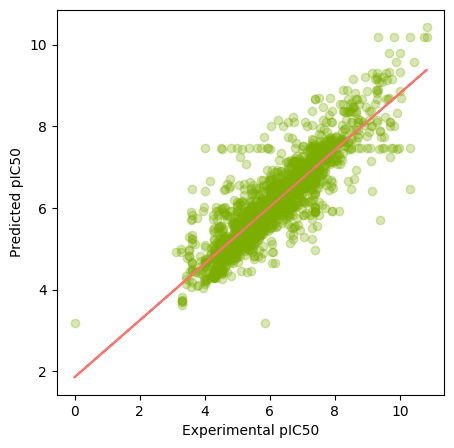

In [15]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

# Save Model as Pickle Object

In [16]:
import pickle

In [17]:
pickle.dump(model, open('aromatase_model.pkl', 'wb'))